In [1]:
from __future__ import print_function
from __future__ import unicode_literals
import gensim
print(gensim.__version__)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


3.5.0


In [2]:
from gensim.models import KeyedVectors

In [3]:
# Creating the model
#https://s3-us-west-1.amazonaws.com/fasttext-vectors/wiki.ta.vec
en_model = KeyedVectors.load_word2vec_format('wiki.ta/wiki.ta.vec')


In [4]:
# Getting the tokens 
words = []
for word in en_model.vocab:
    words.append(word)

In [5]:
# Printing out number of tokens available
print("Total number of Tokens: {}".format(len(words)))

Total number of Tokens: 245402


In [6]:
# Printing out the dimension of a word vector 
print("Dimension of a word vector: {}".format(
    len(en_model[words[0]])
))

Dimension of a word vector: 300


In [7]:
# Print out the vector of a word 
print("Vector components of a word: {}".format(
    en_model[words[0]]
))

Vector components of a word: [-2.0474e-01 -1.1623e-01  4.3407e-02  2.3401e-01 -3.6121e-01  1.3654e-03
 -9.3015e-02 -1.6635e-01 -2.1929e-02 -1.6483e-01 -3.5976e-01  7.4665e-02
 -3.7621e-01  3.5663e-02 -8.3866e-02  2.3662e-01 -2.5716e-01  2.0853e-01
 -9.4615e-02  1.9007e-01  2.1289e-01 -9.4380e-02 -4.1414e-02 -1.3878e-01
 -4.9567e-02  3.3041e-01  2.4192e-01  1.1167e-02 -5.2642e-01 -1.9130e-01
 -5.8776e-02 -6.1682e-02  1.3825e-01  2.1313e-01  1.2205e-01  4.6448e-02
  1.9427e-01  4.3552e-02  1.1155e-01 -1.7314e-01  1.7309e-02  2.8439e-01
 -1.6795e-01  1.5461e-01  2.0054e-02  1.0723e-02 -1.0999e-02 -3.2527e-02
 -8.3079e-02 -1.2634e-01  1.2743e-01 -1.5980e-01 -1.4096e-01 -1.0939e-01
 -1.7693e-02  4.6372e-02  1.6729e-01 -1.6625e-01 -6.8415e-02 -1.1484e-01
  1.3002e-02 -3.2336e-02 -1.7564e-01  2.8781e-01  2.4220e-01 -1.9403e-01
  3.4559e-01 -2.1009e-01 -7.8034e-02  6.0678e-02 -1.7047e-01  1.2390e-01
  1.0045e-01  7.3165e-02  1.0066e-01 -1.2815e-01 -3.5039e-02  1.5828e-01
 -9.6777e-02 -6.5584e-

In [8]:
# Pick a word 
find_similar_to = 'ஒன்று'

In [9]:
# Finding out similar words [default= top 10]
for similar_word in en_model.similar_by_word(find_similar_to):
    print("Word: {0}, Similarity: {1:.2f}".format(
        similar_word[0], similar_word[1]
    ))

Word: ஒன்று+, Similarity: 0.81
Word: ஒன்ற, Similarity: 0.75
Word: ஒன்றூ, Similarity: 0.74
Word: ஒன்றுமாக, Similarity: 0.70
Word: ஒன்றும், Similarity: 0.69
Word: ஒன்றா, Similarity: 0.69
Word: ஒன்றொழி, Similarity: 0.67
Word: ஒன்றொடொன்று, Similarity: 0.67
Word: ஒன்றென, Similarity: 0.64
Word: ஒன்றுமாகும், Similarity: 0.64


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [10]:
# Test words 
word_add = ['டாக்கா', 'இந்தியா']
word_sub = ['பங்களாதேஷ்']

# Word vector addition and subtraction 
for resultant_word in en_model.most_similar(
    positive=word_add, negative=word_sub
):
    print("Word : {0} , Similarity: {1:.2f}".format(
        resultant_word[0], resultant_word[1]
    ))


Word : பாஷாஇந்தியா , Similarity: 0.60
Word : இந்தியாn , Similarity: 0.59
Word : கோந்தியா , Similarity: 0.55
Word : ஜைந்தியா , Similarity: 0.54
Word : இந்தியானா , Similarity: 0.51
Word : சைந்தியா , Similarity: 0.50
Word : பிரதேசம்,இந்தியா , Similarity: 0.49
Word : இந்தியாவிலே , Similarity: 0.49
Word : தாந்தியா , Similarity: 0.48
Word : விந்தியா , Similarity: 0.48


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [11]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [12]:
# Limit number of tokens to be visualized
limit = 500
vector_dim = 300

# Getting tokens and vectors
words = []
embedding = np.array([])
i = 0

In [13]:
for word in en_model.vocab:
    # Break the loop if limit exceeds 
    if i == limit: break

    # Getting token 
    words.append(word)

    # Appending the vectors 
    embedding = np.append(embedding, en_model[word])

    i += 1

In [14]:
# Reshaping the embedding vector 
embedding = embedding.reshape(limit, vector_dim)


In [20]:
plt.rcParams.keys()
from matplotlib.font_manager import FontProperties 
tamil = FontProperties(fname=r'C:\Personal\Study\pytorch\tamil\vector\UnicodeFonts-IlaSundaram-Set1\Uni Ila.Sundaram-01.ttf', size=14) 


In [21]:
def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"

   # plt.rcParams['font.family'] = ['Uni Ila.Sundaram-01']
   # plt.rcParams['font.serif'] = ['Uni Ila.Sundaram-01']
    
    #mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
    #matplotlib.rc('font', family='Uni Ila.Sundaram-01')
    #C:\Personal\Study\pytorch\UnicodeFonts-IlaSundaram-Set1
    plt.figure(figsize=(30, 30))  # in inches
    for i, label in enumerate(labels):
       # print (label)
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        if not label.isalpha():
            plt.annotate(label,
                     xy=(x, y),
                     xytext=(20, 50),
                     textcoords='offset points',
                     ha='right',
                     va='bottom',fontproperties=tamil)
    #plt.savefig(filename)
    

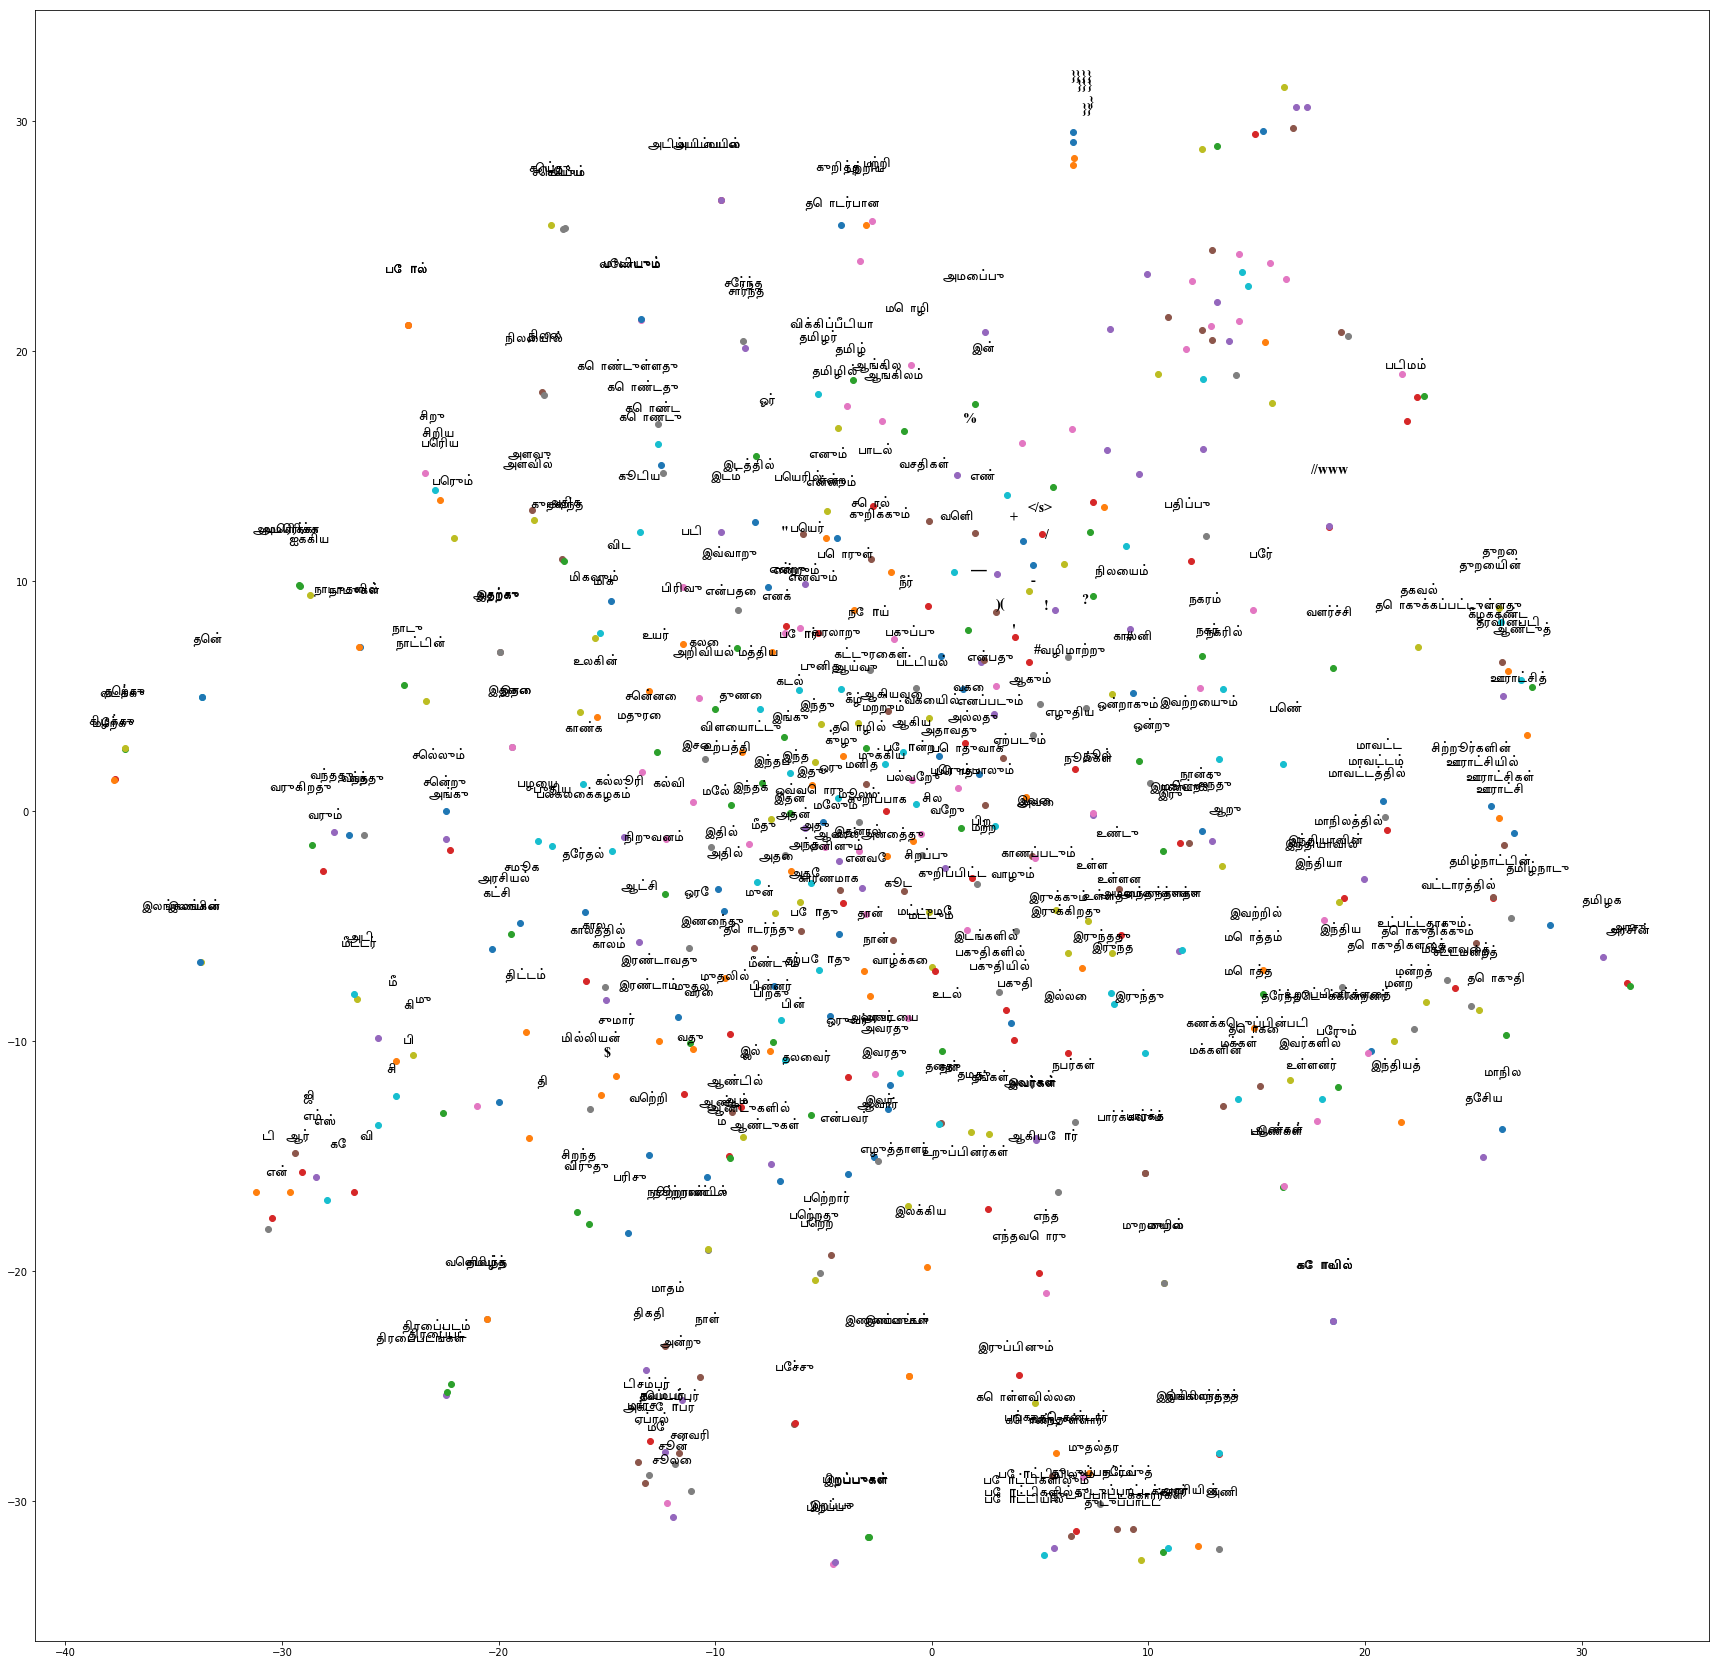

In [22]:
# Creating the tsne plot [Warning: will take time]
tsne = TSNE(perplexity=20.0, n_components=2, init='pca', n_iter=5000)

low_dim_embedding = tsne.fit_transform(embedding)

# Finally plotting and saving the fig 
plot_with_labels(low_dim_embedding, words)
plt.show()

In [28]:
import matplotlib as mpl; print(mpl.font_manager.get_cachedir())

C:\Users\SNNTN2\.matplotlib
